# Datos Aumentados

La escensia para obtener una red neuronal o en general un modelo predictivo de calidad reside en el entrenamiento aplicado al mismo. Para poder lograr un entrenamiento exitoso es indispensable contar con un conjunto de datos de calidad.

Es habitual enfrentarse a problemas donde los conjuntos de datos disponibles no satisfacen las necesidades, ya sea por su reducida extensión o execiva cantidad de ruido, por lo tanto no permiten realizar entrenamientos efectivos y obtener modelos con altos niveles de presición. De los principales problemas al entrenar un algoritmo con un conjunto de datos reducidos, es el overfitting o sobreajuste. Los datos son tan pocos que basicamente el algoritmo se aprende el resultado para cada uno de los datos del conjunto de pruebas teniendo una precision muy alta en el entrenamiento y muy baja con datos nuevos. Esta es la idea detras del concepto de sobreajuste.

Este es precisamente el problema que se pretende atacar con tecnicas de datos aumentados. Se pueden manipular los datos disponibles para aumentar el conjunto y de este manera poder aplicar un mucho mejor entrenamiento al algoritmo.

## Técinas

### Voltear

Tal y como su nombre lo menciona esta técnica consiste en voltear las imagenes, ya sea horizontal o verticalmente. Voltear hace referencia basicamente al espejo de la imagen ya sea en el eje x o en el eje y, lo cual no es lo mismo que rotar.

Se muestra a continuación un ejemplo utilizando numpy para voltear una imagen. Para iniciar se introduce el nombre de la imagen a utilizar (asumiendo que se encuentra al mismo nivel que el notebook).

In [1]:
img = "Messi.jpg"

Se despliega a continuación la imagen a utilizar para ejemplificar las diferentes técnicas. Inicialmente se debe transformar al imagen a una matriz para que pueda ser proceda y manipulada correctamente. Para esto se utiliza la libreria Matplotlib.

In [2]:
import matplotlib.pyplot as plot

plotImg = plot.imread(img)
plot.imshow(plotImg)

Ahora se procede a voltear la imagen utilizando la libreria numpy, la cual nos permite voltearla imagen tanto horizontalmente:

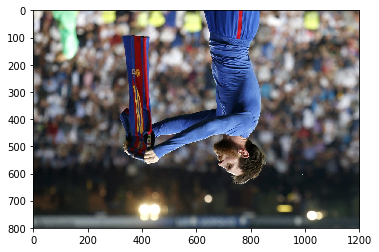

In [31]:
import numpy as np

imgFlip = np.flipud(plotImg)
plot.imshow(imgFlip)

Al igual que de manera vertical:

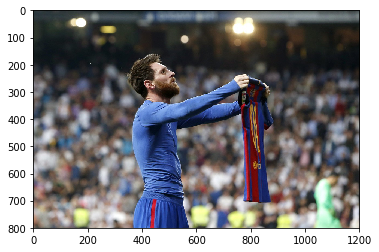

In [32]:
imgFlip = np.fliplr(plotImg)
plot.imshow(imgFlip)

TensorFlow tambien permite realizar este tipo de manipulacion a las imagenes. A continuacion se muestran los ejemplos. Para poder utilizar TensorFlow se debe incializar una sesion que permite manipular y desplegar las imagenes. Ademas se carga la imagen jpg y se decodifica para luego procesarla.

In [6]:
import tensorflow as tf

fileName = [img]
fileNameQueue = tf.train.string_input_producer(fileName)

reader = tf.WholeFileReader()
key,val = reader.read(fileNameQueue)

imgTF = tf.image.decode_jpeg(val)

init_op = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init_op)

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord,sess=sess)

Ahora se procede a voltera la imagen horizontalmente:

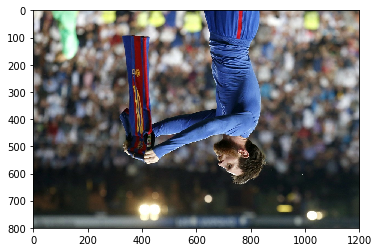

In [33]:
imgFlip = tf.image.flip_up_down(imgTF)
imgPlot = imgFlip.eval(session=sess) 

plot.imshow(imgPlot)

De igual forma, vertical:

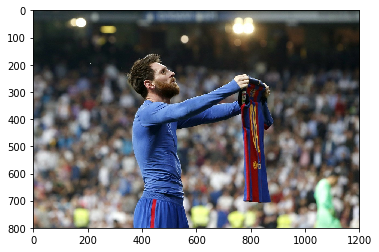

In [34]:
imgFlip = tf.image.flip_left_right(imgTF)
imgPlot = imgFlip.eval(session=sess) 

plot.imshow(imgPlot)

### Rotar

La imagen se puede rotar a los grados que se deseen. El primer ejemplo sera utilizando numpy, libreria que permite rotar una imagen en aunglos de 90 grados facilmente en direccion contraria a las manecillas del reloj. 

Se vuelve a leer la imagen y se procede a rotar 90 grados.

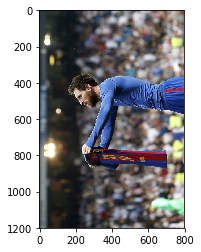

In [35]:
plotImg = plot.imread(img)

imgRot = np.rot90(plotImg)
plot.imshow(imgRot)

Se puede pasar por parametro la cantidad de veces que se quiere rotar la imagen. Por ejemplo se rotara la imagen 2*90 = 180 grados.

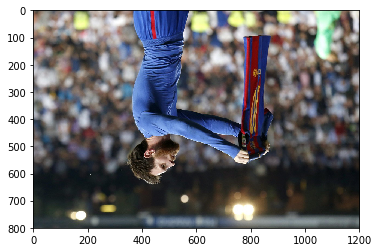

In [10]:
imgRot = np.rot90(plotImg,2)
plot.imshow(imgRot)

TensorFlow permite de forma muy similar realizar rotaciones en angulos de 90 grados, contrario a las manecilals de reloj. De igual forma por parametro se le indica la cantidad de veces que se desea rotar la imagen. 

Aprovechandonos de la sesion que previamente ya habiamos inicializado, se muestra el ejemplo a continuacion rotando la imagen 3*90 = 270 grados.

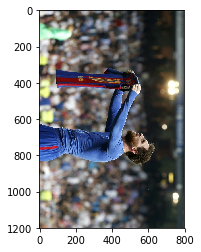

In [36]:
imgRot = tf.image.rot90(imgTF,k=3)
imgPlot = imgRot.eval(session=sess) 

plot.imshow(imgPlot)

TensorFlow brinda ademas la capacidad de poder indicar de manera especifica la cantidad de grados que se desea girar la figura, no necesariamente en multiplos de 90 grados.

Se le puede indicar por parametro la cantidad de radianes que se quiere rotar la imagen. Para esto en el siguiente ejemplo se realiza una pequeña conversion para pasar 45 grados a radianes y rotar la imagen.

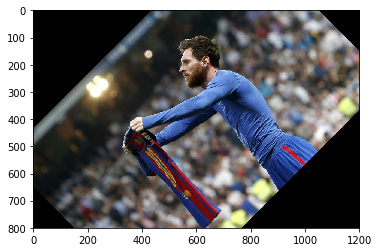

In [37]:
import math

degrees = 45
radian = degrees*math.pi/180
imgRot = tf.contrib.image.rotate(imgTF, angles=radian)
imgPlot = imgRot.eval(session=sess)

plot.imshow(imgPlot)

Esto evidentemente nos muestra un problema, el tamaño y las dimensiones de la imagen varian, lo cual no es conveniente y puede generar ruido en nuestro set de datos. Hay diferentes mecanismos conocidos todos como metodos de interpolacion para solucionar estos inconvenientes.

Ademas de estos dos ejemplos hay una gran variedad de librerias de procesamiento de imagenes que permiten realizar rotaciones.

### Escalar / Cortar

La imagen se puede escalar haciendola mas grande o mas pequeña. En caso de hacerla mas grande, normalmente se recorta aquellas partes que queden por fuera del tamaño orignal, esto para mantener las dimensiones de la imagen, en caso de que asi se requiera. En el otro sentido, es decir, haciendo la imagen mas pequeña, se tiene le mismo problema denotado en la ultima seccion de rotaciones. Este puede ser resuleto con interpolacion, o cambiando el tamaño de la imagen si esto no resulta un inconveniente.

Este conecpto resulta similar a recortar la imagen, ya que si se recorta y se debe mantener el tamaño original, la imagen debe ser escalada. Por eso se exponen ambas técnicas en conjunto.

Utilizando la libreria scikit-image, la cual se enfoca en el procesamiento de imagenes precisamente, resulta muy sencillo escalar una imagen. En este caso utilizando la funcion de "rescale" se cambiara el tamaño de la imagen, es decir, no ser cortara. Mediante un parametro se indicara el factor por el cual se desea escalar. Inicialmente se dsiminuirá la imagen utilizando un factor de 0.5.

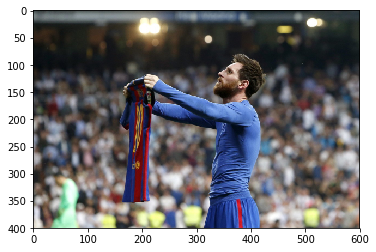

In [15]:
import skimage

imgScale = skimage.transform.rescale(plotImg, scale=0.5, mode='constant')
plot.imshow(imgScale)

Facilmente se observa que la imagen disminuyo (utilizando las referencias de los ejes), porque la funcion rescale por si sola no mantiene el tamaño original. Lo mismo ocurre en el caso de utilizar un factor mayor a 1, la imagen cambiara su tamaño a uno mas grande, tal y como se observa en el siguiente ejemplo.

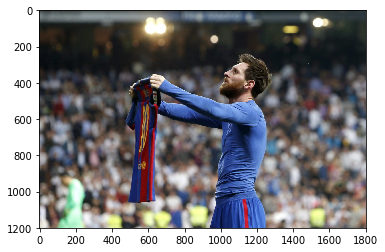

In [16]:
imgScale = skimage.transform.rescale(plotImg, scale=1.5, mode='constant')
plot.imshow(imgScale)

En este último caso, se puede cortar la imagen y obtener una version del tamaño original. Se puede redifinir las dimensiones de la matriz de la imagen.

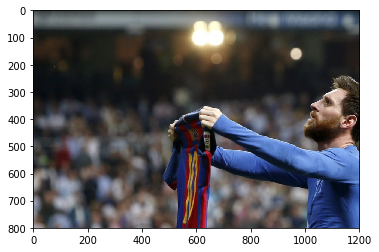

In [17]:
imgScaleCrop = imgScale[0:800,0:1200]
plot.imshow(imgScaleCrop)

En este caso decidimos cortar seleccionando el costado superior de la imagen, pero podriamos jugar con esto dependiendo de cuales sectores de la matriz se deseen seleccionar. Por ejemplo se puede tomar la esquina inferior derecha.

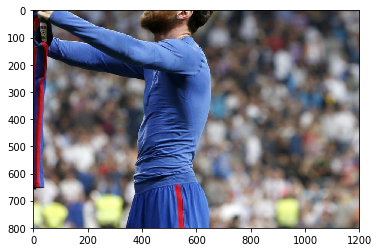

In [18]:
imgScaleCrop = imgScale[400:1200,600:1800]
plot.imshow(imgScaleCrop)

El realizar recortes de manera aleatoria a las imagenes, puede resultar de gran utilidad cuando se quiere aumentar el conjunto de datos con imagenes distintas. Esto es posible de realizar por ejemplo utilizando TensorFlow. Primero se procede a recortar la imagen, a un tamaño mas pequeño que la original, utilizando la funcion random_crop. Esta funcion recibe una semilla como parametro, el cual se puede aleatorizar para asi recortar siempre secciones diferentes de la imagen original.

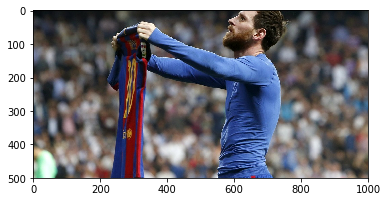

In [38]:
newSize = [500, 1000, 3]

imgCut = tf.random_crop(imgTF, size=newSize, seed=np.random.randint(100))
imgPlot = imgCut.eval(session=sess)

plot.imshow(imgPlot)

Una vez que se obtiene la imagen recortada, se utiliza la funcion resize_images para devolver la imagen a su tamaño original.

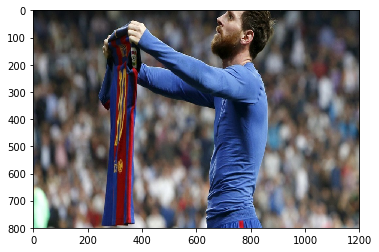

In [39]:
imgCutResize = tf.image.resize_images(imgCut, (800, 1200))
imgPlot = imgCutResize.eval(session=sess)

plot.imshow(imgPlot.astype(np.uint))

### Ruido

Otra técnica utilizada para construir nuevas imagenes es la introducción de ruido, a la imagen original. TensorFlow permite generar distribuciones de ruido normales las cuales se puede sumar a la imagen original y de esta manera generar una perturbación que haga variar la imagen original.

En el siguiente ejemplo se procede a generar una perturbación con distrubución gaussiana, media 0 y desviación estandar 0.2 la cual se suma a la imagen original para generar una nueva.

W0718 15:43:48.799365 140194285933952 image.py:656] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


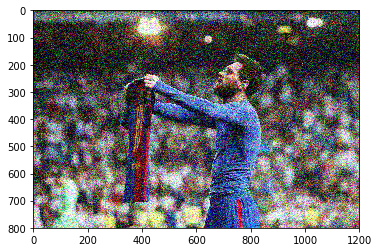

In [22]:
noise = tf.random_normal(shape=tf.shape(imgTF), mean=0.0, stddev=.2, dtype=tf.float32)
imgTFF = tf.image.convert_image_dtype(imgTF, tf.float32)
imgNoise = tf.add(imgTFF, noise)
imgPlot = imgNoise.eval(session=sess)

plot.imshow(imgPlot)

## Ejemplo

Para poder apreciar mejor los beneficios de aumentar los datos de una red neuronal con datos sintéticos, se desarrolla un ejemplo que consiste en un clasificador de imágenes de perros y gatos.

El clasificador consiste en una red neuronal de tipo CNN y se utiliza la librería keras para su implementación.

El primer paso es importar todos los paquetes de keras requeridos con los cuales se va a construir la CNN.

In [24]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

En la línea 2, se importa Secuential para inicializar el modelo de red neuronal como una red secuencial de capas.

En la línea 3, se importa Conv2D, esto es para realizar la operación de convolución, es decir, el primer paso de una CNN.

En la línea 4, se importa MaxPooling2D que se usa para la operación de agrupación, que es el paso 2 en el proceso de creación de una CNN. Para construir esta red neuronal en particular, se utiliza una función de agrupación máxima.

En la línea 5, se importa Flatten que se usa para aplanar. El aplanamiento es el proceso de convertir todas las matrices bidimensionales resultantes en un solo vector lineal continuo largo.

Y finalmente, en la línea 6, se importa Dense que se utiliza para realizar la conexión completa de la red neuronal, que es el paso 4 en el proceso de creación de una CNN.

In [25]:
from IPython.display import Image, display

https://www.kaggle.com/tongpython/cat-and-dog

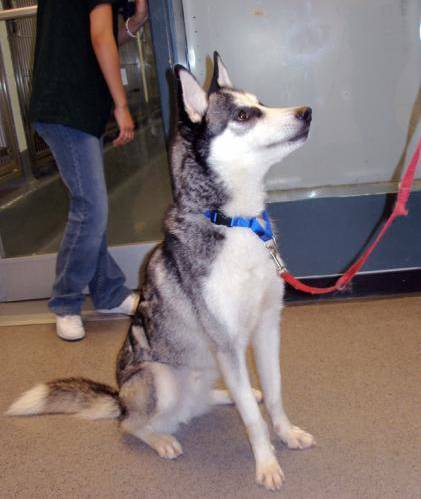

In [26]:
display(Image('cat-and-dog/test_set/dogs/dog.4001.jpg'))

In [28]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('cat-and-dog/training_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 save_to_dir = 'tmp')

test_set = test_datagen.flow_from_directory('cat-and-dog/test_set/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [41]:
#fit the model
classifier.fit(training_set,
                         steps_per_epoch = 256,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 64)

AttributeError: 'DirectoryIterator' object has no attribute 'ndim'

## Actualidad

Se ha querido orientar las tecnicas de datos aumentados hacia la automatizacion. Es claro y completamente combrado que estas tecnicas son eficientes y mejoran muy significativamente la precision de los modelos, pero el proceso de generar nuevos datos a partir del conjunto ya existente resulta bastante manual. Parte de la areas donde se ha invertido tiempo e investagacion es en automatizar este proceso de aumentar los datos. Y eso algo que ya tenemos a disposicion en las librerias mas utilizadas para contruir redes neuronales.

Los autores Ekin D. Cubuk, Barret Zoph, Dandelion Mané, Vijay Vasudevan y Quoc V. Le presentan un articulo en el 2019 llamado: "AutoAugment: Learning Augmentation Strategies from Data", en el cual muestran un procedimiento para automatizar el proceso de generar los datos aumentados. Utilizan algoritmos para buscar la mejor tecnica de aumentado, es decir, la que les permita tener el nivel de precision mas alto en la red neuronal que se desea entrenar. Ellos comentan que la diferencia entre los procedimientos que exponen y otras metodologias de automatizacion ya existentes esque el objetivo de AutoAugment pretende mejorar directamente la precision del modelo, mientras que la mayoria de los demas metodos de automatizacion se enfocan unicamente en generar mas datos que tengan una correcta relacion con el resto del conjunto.

Otra orientacion que ha tenido la investagacion en este campo, es el crear redes neuronales entrenadas para poder precisamente generar los datos aumentados. Los autores Antreas Antoniou, Amos Storkey y Harrison Edwards elaboraron una investigacion sobre un concepto que ellos denominan DAGAN (Data Augmentation Generative Adversarial Network). Consiste precisamente en disenar y entrenar una red neuronal generativa. Los algoritmos generativos se basan en la distribucion de probabilidad conjunta, es decir, se intenta comprender como se generaron los datos. Los autores comentan de mejoras de hasta un 13% en los diferentes experimentos que realizaron.

Como retos hacia el futuro, uno de los temas que se investiga es la capacidad de utilizar este tipo de tecnicas no solo en imagenes si no tambien en videos. De los retos mas grandes en la recoleccion de videos son las diferentes condiciones climaticas. Utilizando tecnicas de datos aumentados es posible generar esos dieferentes escenarios sinteticamente. Jason Wang y Luis Perez comentan sobre la posible aplicacion de esto en el desarrollo de vehiculos autonomos, donde la seguridad juega un papel vital. Se podrian generar condiciones climatologicas criticas para aumentar la seguridad de los algoritmos utilizados en estos sistemas tan complejos y delicados.


## Bibiografia

Cubuk, E., Zoph, B., Mane, D., Vasudevan, V., & Le, Q. (2019). AutoAugment: Learning Augmentation Policies from Data.

Antoniou, A., Storkey, A., & Edwards, H. (2018). Data Augmentation Generative Adversarial Networks.

Perez, L., & Wang, J. (2018). The Effectiveness of Data Augmentation in Image Classification using Deep Learning.